<a href="https://colab.research.google.com/github/vijaynadimpalli/MarvinVoiceActivation/blob/main/Marvin_Activation_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://stackoverflow.com/questions/48309631/tensorflow-tf-data-dataset-reading-large-hdf5-files

#https://stackoverflow.com/questions/47059698/keras-custom-data-generator-for-large-hdf5-file-which-does-not-fit-into-memory

In [ ]:
!pip install pydub

!pip install wget

!pip install gitpython


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=3790c9ed992d3a26eca9bc03a3325dea75bc88d8452f2531be1d84b00c4ba2f7
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
     |████████████████████████████████| 163kB 4.6MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 


In [ ]:
import git
import os
import shutil
import tempfile

t = tempfile.mkdtemp()
# Clone into temporary dir
git.Repo.clone_from('https://github.com/vijaynadimpalli/MarvinVoiceActivation.git', t)
# Copy desired file from temporary dir
shutil.move(os.path.join(t, 'DataCreator.py'), '.')
# Remove temporary dir
shutil.rmtree(t)

In [ ]:
import DataCreator
from DataCreator import *

num_actives = 500
num_negatives = 500
train_examples = 6400
val_examples = 1280
chunk_size = 16
#takes about 20 min to run for 15000 examples

!python DataCreator.py $num_actives $num_negatives $train_examples $val_examples $chunk_size #for jupyter and ipython to resolve the lingering RAM issue with ipython due to huge amount of png files.....
#DataCreator.main([num_actives, num_negatives, train_examples, val_examples, chunk_size]) #for pycharm

500
0.0 Chunk stored
1.0 Chunk stored
2.0 Chunk stored
3.0 Chunk stored
4.0 Chunk stored
5.0 Chunk stored
6.0 Chunk stored
7.0 Chunk stored
8.0 Chunk stored
9.0 Chunk stored
10.0 Chunk stored
11.0 Chunk stored
12.0 Chunk stored
13.0 Chunk stored
14.0 Chunk stored
15.0 Chunk stored
16.0 Chunk stored
17.0 Chunk stored
18.0 Chunk stored
19.0 Chunk stored
20.0 Chunk stored
21.0 Chunk stored
22.0 Chunk stored
23.0 Chunk stored
24.0 Chunk stored
25.0 Chunk stored
26.0 Chunk stored
27.0 Chunk stored
28.0 Chunk stored
29.0 Chunk stored
30.0 Chunk stored
31.0 Chunk stored
32.0 Chunk stored
33.0 Chunk stored
34.0 Chunk stored
35.0 Chunk stored
36.0 Chunk stored
37.0 Chunk stored
38.0 Chunk stored
39.0 Chunk stored
40.0 Chunk stored
41.0 Chunk stored
42.0 Chunk stored
43.0 Chunk stored
44.0 Chunk stored
45.0 Chunk stored
46.0 Chunk stored
47.0 Chunk stored
48.0 Chunk stored
49.0 Chunk stored
50.0 Chunk stored
51.0 Chunk stored
52.0 Chunk stored
53.0 Chunk stored
54.0 Chunk stored
55.0 Chunk store

In [ ]:
#@title Commented code for tf.dataset generation using python data generators
# import numpy as np
# import tensorflow as tf

# x_shape = (32, 32, 3)
# y_shape = ()  # A single item (not array).
# classes = 10

# def generator_fn(n_samples):
#     """Return a function that takes no arguments and returns a generator."""
#     def generator():
#         for i in range(n_samples):
#             # Synthesize an image and a class label.
#             x = np.random.random_sample(x_shape).astype(np.float32)
#             y = np.random.randint(0, classes, size=y_shape, dtype=np.int32)
#             yield x, y
#     return generator

# def augment(x, y):
#     return x * tf.random.normal(shape=x_shape), y

# samples = 10
# batch_size = 5
# epochs = 2

# # Create dataset.
# gen = generator_fn(n_samples=samples)
# dataset = tf.data.Dataset.from_generator(
#     generator=gen, 
#     output_types=(np.float32, np.int32), 
#     output_shapes=(x_shape, y_shape)
# )
# # Parallelize the augmentation.
# dataset = dataset.map(
#     augment, 
#     num_parallel_calls=tf.data.experimental.AUTOTUNE,
#     # Order does not matter.
#     deterministic=False
# )
# dataset = dataset.batch(batch_size, drop_remainder=True)
# # Prefetch some batches.
# dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

# # Prepare model.
# model = tf.keras.applications.VGG16(weights=None, input_shape=x_shape, classes=classes)
# model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# # Train. Do not specify batch size because the dataset takes care of that.
# model.fit(dataset, epochs=epochs)

In [ ]:
#@title Relevant Generator function for Dataset method
# def generator_fn():
#     """Return a function that takes no arguments and returns a generator."""
#     def generator():
#         while True:
#             # Synthesize an image and a class label.
#             x,y = create_training_example(backgrounds, activates, negatives)
#             yield x.T, y.T
#     return generator

# """
# x_shape = (Tx,n_freq)
# y_shape = (Ty,1)

# # Create dataset.
# gen = generator_fn()
# dataset = tf.data.Dataset.from_generator(
#     generator=gen, 
#     output_types=(np.float32, np.float32), 
#     output_shapes=(x_shape, y_shape)
# )
# dataset = dataset.batch(32, drop_remainder=True)
# # Prefetch some batches.
# dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)


# hist = model.fit(dataset, epochs=10,steps_per_epoch=100,callbacks=[checkpointer])

# """

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import random
import sys
import io
import os
import glob
import IPython
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization, Reshape, RNN, SimpleRNN
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import classification_report,confusion_matrix,f1_score
import pandas

In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self,x,y, batch_size=32, chunk_size = 16, shuffle=True):
        self.batch_size = batch_size
        self.chunk_size = chunk_size
        self.x = x
        self.y = y
        self.indices = np.arange(0,x.shape[0],chunk_size)
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return np.floor(self.x.shape[0]/self.batch_size).astype('int')

    def __getitem__(self, index): #input is batch number in a particular epoch
        index = self.index[index * np.floor(self.batch_size/self.chunk_size).astype('int'):(index + 1) * np.floor(self.batch_size/self.chunk_size).astype('int')]
        start_locs = [self.indices[k] for k in index]
        
        X, y = self.__get_data(start_locs)
        return X, y

    def on_epoch_end(self):
        self.index = np.arange(len(self.indices))
        if self.shuffle == True:          
          #print("Shuffling")
          np.random.shuffle(self.index)

    def __get_data(self, start_locs):
        X = np.zeros((self.batch_size,Tx,n_freq))
        y = np.zeros((self.batch_size,Ty,1))
        
        for i, start in enumerate(start_locs):
          X[i:i+self.chunk_size,:,:] = np.array(self.x[start:start+self.chunk_size,:,:])
          y[i:i+self.chunk_size,:,:] = np.array(self.y[start:start+self.chunk_size,:,:])

        return X, y

In [ ]:
f1 = h5py.File("./XY_train/XY.h5",'r')
f2 = h5py.File("./XY_dev/XY_dev.h5",'r')
batch_size = 256

train_generator = DataGenerator(f1['X_train'],f1['Y_train'],batch_size=batch_size,chunk_size=chunk_size)
test_generator = DataGenerator(f2['X_test'],f2['Y_test'],batch_size=batch_size,chunk_size=chunk_size)

In [ ]:
from tensorflow.keras import backend as K
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



#Another F1 function implementation(Using inbuilt metrics).....
pres = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()  

def get_f1(y_true,y_pred):

  #pres.reset_states()             #Using these reset_states gives same values as given by f1_m function
  #rec.reset_states()              #reset_states clears any persistence,and clears it for every batch,giving same functionality as f1_m
  pres.update_state(y_true,y_pred) #Not using reset_states averages out the f1 values over all batches in an epoch and doesn't reset with new epoch...
  rec.update_state(y_true,y_pred)

  return 2*pres.result()*rec.result()/(pres.result()+rec.result()+K.epsilon())


class reset_states_f1(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=[]):
    print("Resetting states of get_f1 metric")
    pres.reset_states()
    rec.reset_states()

  def on_test_batch_begin(self,batch,logs=[]):
    if batch==0:
      print("Resetting states of get_f1 metric at start of validation batches")
      pres.reset_states()
      rec.reset_states()


In [ ]:
def model(input_shape):
    """
    Function creating the model's graph in Keras.
    
    Argument:
    input_shape -- shape of the model's input data (using Keras conventions)

    Returns:
    model -- Keras model instance
    """
    
    X_input = Input(shape = input_shape)
    
    ### START CODE HERE ###
    
    # Step 1: CONV layer (≈4 lines)
    X = Conv1D(filters=196,kernel_size=15,strides=4)(X_input)                                 # CONV1D
    X = BatchNormalization()(X)                                 # Batch normalization
    X = Activation('relu')(X)                                 # ReLu activation
    X = Dropout(0.8)(X)                                 # dropout (use 0.8)

    # Step 2: First GRU Layer (≈4 lines)
    X = GRU(128,return_sequences=True)(X)                                 # GRU (use 128 units and return the sequences)
    X = Dropout(0.8)(X)                                        # dropout (use 0.8)
    X = BatchNormalization()(X)                                     # Batch normalization
    

    # Step 3: Second GRU Layer (≈4 lines)
    X = GRU(128,return_sequences=True)(X)                                 # GRU (use 128 units and return the sequences)
    X = Dropout(0.8)(X)                                 # dropout (use 0.8)
    X = BatchNormalization()(X)                                 # Batch normalization
    X = Dropout(0.8)(X)                                 # dropout (use 0.8)
    
    # Step 4: Time-distributed dense layer (see given code in instructions) (≈1 line)
    X = TimeDistributed(Dense(1, activation = "sigmoid"))(X) # time distributed  (sigmoid)

    ### END CODE HERE ###

    model = Model(inputs = X_input, outputs = X)
    
    return model  


# In[33]:


model = model(input_shape = (Tx, n_freq))
model.summary()


opt = Adam(lr=1e-2)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy", get_f1,f1_m])

lr_scheduler = LearningRateScheduler(lambda epoch: 1e-5*(10**(epoch/40)))
checkpointer = ModelCheckpoint('./model/',save_best_only=True,monitor='val_get_f1',mode='max',save_weights_only=True,verbose=0)

hist = model.fit(train_generator,validation_data=test_generator,epochs=120,callbacks=[checkpointer,reset_states_f1()])


# loss, acc = model.evaluate(test_generator)
# print("Dev set accuracy = ", acc)




Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1998, 101)]       0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 196)          297136    
_________________________________________________________________
batch_normalization (BatchNo (None, 496, 196)          784       
_________________________________________________________________
activation (Activation)      (None, 496, 196)          0         
_________________________________________________________________
dropout (Dropout)            (None, 496, 196)          0         
_________________________________________________________________
gru (GRU)                    (None, 496, 128)          125184    
_________________________________________________________________
dropout_1 (Dropout)          (None, 496, 128)         

In [ ]:
#plt.semilogx(hist.history['lr'],hist.history['val_loss'])

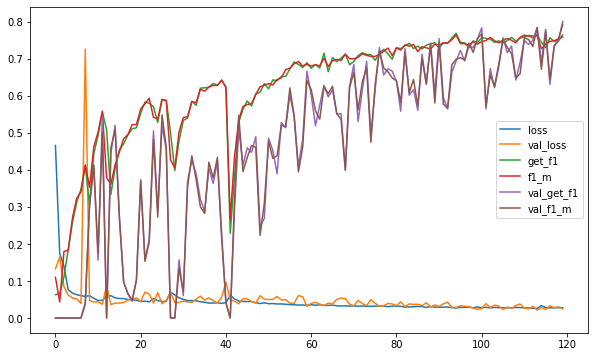

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(hist.history['loss'],label='loss')

plt.plot(hist.history['val_loss'],label='val_loss')

plt.plot(hist.history['get_f1'],label='get_f1')

plt.plot(hist.history['f1_m'],label='f1_m')

plt.plot(hist.history['val_get_f1'],label='val_get_f1')

plt.plot(hist.history['val_f1_m'],label='val_f1_m')

plt.legend()

In [ ]:
def detect_triggerword(filename,model):
    plt.subplot(2, 1, 1)

    x = graph_spectrogram(filename)
    # the spectrogram outputs (freqs, Tx) and we want (Tx, freqs) to input into the model
    x  = x.swapaxes(0,1)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    
    plt.subplot(2, 1, 2)
    plt.plot(predictions[0,:,0])
    plt.ylabel('probability')
    plt.show()
    return predictions



chime_file = "./chime.wav"
def chime_on_activate(filename, predictions, threshold):
    audio_clip = AudioSegment.from_wav(filename)
    chime = AudioSegment.from_wav(chime_file)
    Ty = predictions.shape[1]
    # Step 1: Initialize the number of consecutive output steps to 0
    consecutive_timesteps = 0
    # Step 2: Loop over the output steps in the y
    for i in range(Ty):
        # Step 3: Increment consecutive output steps
        consecutive_timesteps += 1
        # Step 4: If prediction is higher than the threshold and more than 75 consecutive output steps have passed
        if predictions[0,i,0] > threshold and consecutive_timesteps > 75:
            # Step 5: Superpose audio and background using pydub
            audio_clip = audio_clip.overlay(chime, position = ((i / Ty) * audio_clip.duration_seconds)*1000)
            # Step 6: Reset consecutive output steps to 0
            consecutive_timesteps = 0
        
    audio_clip.export("chime_output.wav", format='wav')

In [ ]:
activates, negatives, backgrounds = load_raw_audio()
create_training_example(backgrounds, activates, negatives)
filename = "./train.wav"
model.load_weights('./model/')
prediction = detect_triggerword(filename,model)
chime_on_activate(filename, prediction, 0.5)
IPython.display.Audio("./chime_output.wav")

In [ ]:
# y_pred = np.where(model.predict(test_generator) > 0.5,1,0)
# print(classification_report(Y_dev.flatten(),y_pred.flatten()))
# print(confusion_matrix(Y_dev.flatten(),y_pred.flatten()))
# print(f1_score(Y_dev.flatten(),y_pred.flatten(),average='binary'))

# #TODO :: Fix this.....

In [ ]:
f1.close()
f2.close()

In [ ]:
!kill -9 -1